In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load dataset
df = pd.read_csv("kaggle_survey_2017_2021.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,

In [4]:
df.head(5)

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [5]:
# Shape of dataset
print("\n Dataset Shape (rows, columns):", df.shape)
# Dataset info (datatypes + non-null counts)
print("\n Dataset Info:")
print(df.info())

# Summary statistics (numeric cols only)
print("\n Summary Statistics:")
print(df.describe())

print("\n Data Types of each column:")
print(df.dtypes)


 Dataset Shape (rows, columns): (106302, 293)

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB
None

 Summary Statistics:
             -  Time from Start to Finish (seconds)      Q1      Q2      Q3  \
count   106302                                89586  105857  106207  106181   
unique       7                                12778      12      10      78   
top       2021                                  394   25-29    Male   India   
freq     23926                                  105   23748   49178   25192   

                       Q4       Q5         Q6 Q7_Part_1 Q7_Part_2  ...  \
count              103319    99088      92786     65943     20885  ...   
unique                 13       36         21         2         2  ...   
top     Masterâ€™s degree  Student  3-5 years    Python         R  ...   
freq                37395    21242      15995     65942  

In [6]:
 df.isnull().sum()


-                                           0
Time from Start to Finish (seconds)     16716
Q1                                        445
Q2                                         95
Q3                                        121
                                        ...  
Q38_B_Part_6                           105015
Q38_B_Part_7                           105084
Q38_B_Part_9                           105116
Q38_B_Part_11                           98677
Q38_B_OTHER                            105673
Length: 293, dtype: int64

### Data cleaning

In [8]:
# Handle Duplicates
df = df.drop_duplicates()

# Handle Missing Values
df = df.fillna("Unknown")

# Fix Encoding Issues (like Masterâ€™s -> Master’s)
df = df.applymap(lambda x: x.replace("â€™", "’") if isinstance(x, str) else x)

#  Convert Numeric Columns

# "Time from Start to Finish (seconds)" should be numeric
if "Time from Start to Finish (seconds)" in df.columns:
    df["Time from Start to Finish (seconds)"] = pd.to_numeric(
        df["Time from Start to Finish (seconds)"], errors="coerce"
    ).fillna(0)
# Encoding
label_encoder = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    try:
        df[col + "_encoded"] = label_encoder.fit_transform(df[col].astype(str))
    except Exception as e:
        print(f"⚠️ Could not encode column {col}: {e}")



print("\n Shape after cleaning:", df.shape)
print("\n Null values after cleaning:\n", df.isnull().sum().head(15))
print("\n  Encoded Columns:\n", df[[col for col in df.columns if "_encoded" in col]].head())


C:\Users\User\AppData\Local\Temp/ipykernel_13448/2337733997.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "_encoded"] = label_encoder.fit_transform(df[col].astype(str))



 Shape after cleaning: (101846, 585)

 Null values after cleaning:
 -                                      0
Time from Start to Finish (seconds)    0
Q1                                     0
Q2                                     0
Q3                                     0
Q4                                     0
Q5                                     0
Q6                                     0
Q7_Part_1                              0
Q7_Part_2                              0
Q7_Part_3                              0
Q7_Part_4                              0
Q7_Part_5                              0
Q7_Part_6                              0
Q7_Part_7                              0
dtype: int64

  Encoded Columns:
    -_encoded  Q1_encoded  Q2_encoded  Q3_encoded  Q4_encoded  Q5_encoded  \
0          5          12           9          26          13          31   
1          4           7           3          27           1          19   
2          4           7           3          28      

In [9]:
df.head(5)

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1_encoded,Q38_B_Part_2_encoded,Q38_B_Part_3_encoded,Q38_B_Part_4_encoded,Q38_B_Part_5_encoded,Q38_B_Part_6_encoded,Q38_B_Part_7_encoded,Q38_B_Part_9_encoded,Q38_B_Part_11_encoded,Q38_B_OTHER_encoded
0,Year,0.0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,1,1,1,1,1,1,1,1,0,0
1,2021,910.0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,2,2,2,2,2,2,2,2,2,2
2,2021,784.0,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Unknown,Unknown,...,2,2,2,2,2,2,2,2,1,2
3,2021,924.0,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,Unknown,...,2,2,2,2,0,2,2,2,2,2
4,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Unknown,...,2,2,2,2,2,2,2,2,1,2


### Insights Generation


In [21]:
insights = {}

# Insight 1: Top 5 countries of respondents (Q3)
if "Q3" in df.columns:
    top_countries = df["Q3"].value_counts().head(5)
    insights["Top Countries"] = top_countries

# Insight 2: Gender distribution (Q2)
if "Q2" in df.columns:
    gender_dist = df["Q2"].value_counts()
    insights["Gender Distribution"] = gender_dist

# Insight 3: Top 5 programming languages (Q7_Part_*)
# Select all programming language columns
prog_cols = [col for col in df.columns if col.startswith("Q7_Part")]
if prog_cols:
    prog_data = (
        df[prog_cols]
        .apply(pd.Series.value_counts)       # count each value in all columns
        .sum(axis=1)                         # sum across columns
        .drop(["Unknown", np.nan], errors="ignore")  # remove Unknown / NaN
    )
    
    # Filter out numeric garbage (from previous encodings)
    prog_data = prog_data[prog_data.index.astype(str).str.isalpha() | 
                          prog_data.index.astype(str).str.contains(r'[+\-]')]  # keep C++ etc.
    
    insights["Top Programming Languages"] = prog_data.sort_values(ascending=False).head(5)
# Insight 4: Education level of respondents (Q4)
if "Q4" in df.columns:
    edu_dist = df["Q4"].value_counts().head(5)
    insights["Education Level"] = edu_dist

# Insight 5: Job roles of respondents (Q5)
if "Q5" in df.columns:
    job_roles = df["Q5"].value_counts().head(5)
    insights["Job Roles"] = job_roles

# -------------------------
# Print insights
# -------------------------
print("Top 5 Insights from Kaggle Survey Data\n")
for key, value in insights.items():
    print(f"\n {key}:\n{value}\n")


Top 5 Insights from Kaggle Survey Data


 Top Countries:
India                       23936
United States of America    12682
Other                        5532
China                        3502
Russia                       3299
Name: Q3, dtype: int64


 Gender Distribution:
Male                                                 45220
Man                                                  36368
Female                                                9560
Woman                                                 8768
Prefer not to say                                     1276
Prefer to self-describe                                224
A different identity                                   153
Nonbinary                                              140
Non-binary, genderqueer, or gender non-conforming       74
Unknown                                                 62
What is your gender? - Selected Choice                   1
Name: Q2, dtype: int64


 Top Programming Languages:
Python    65942.0
SQL   

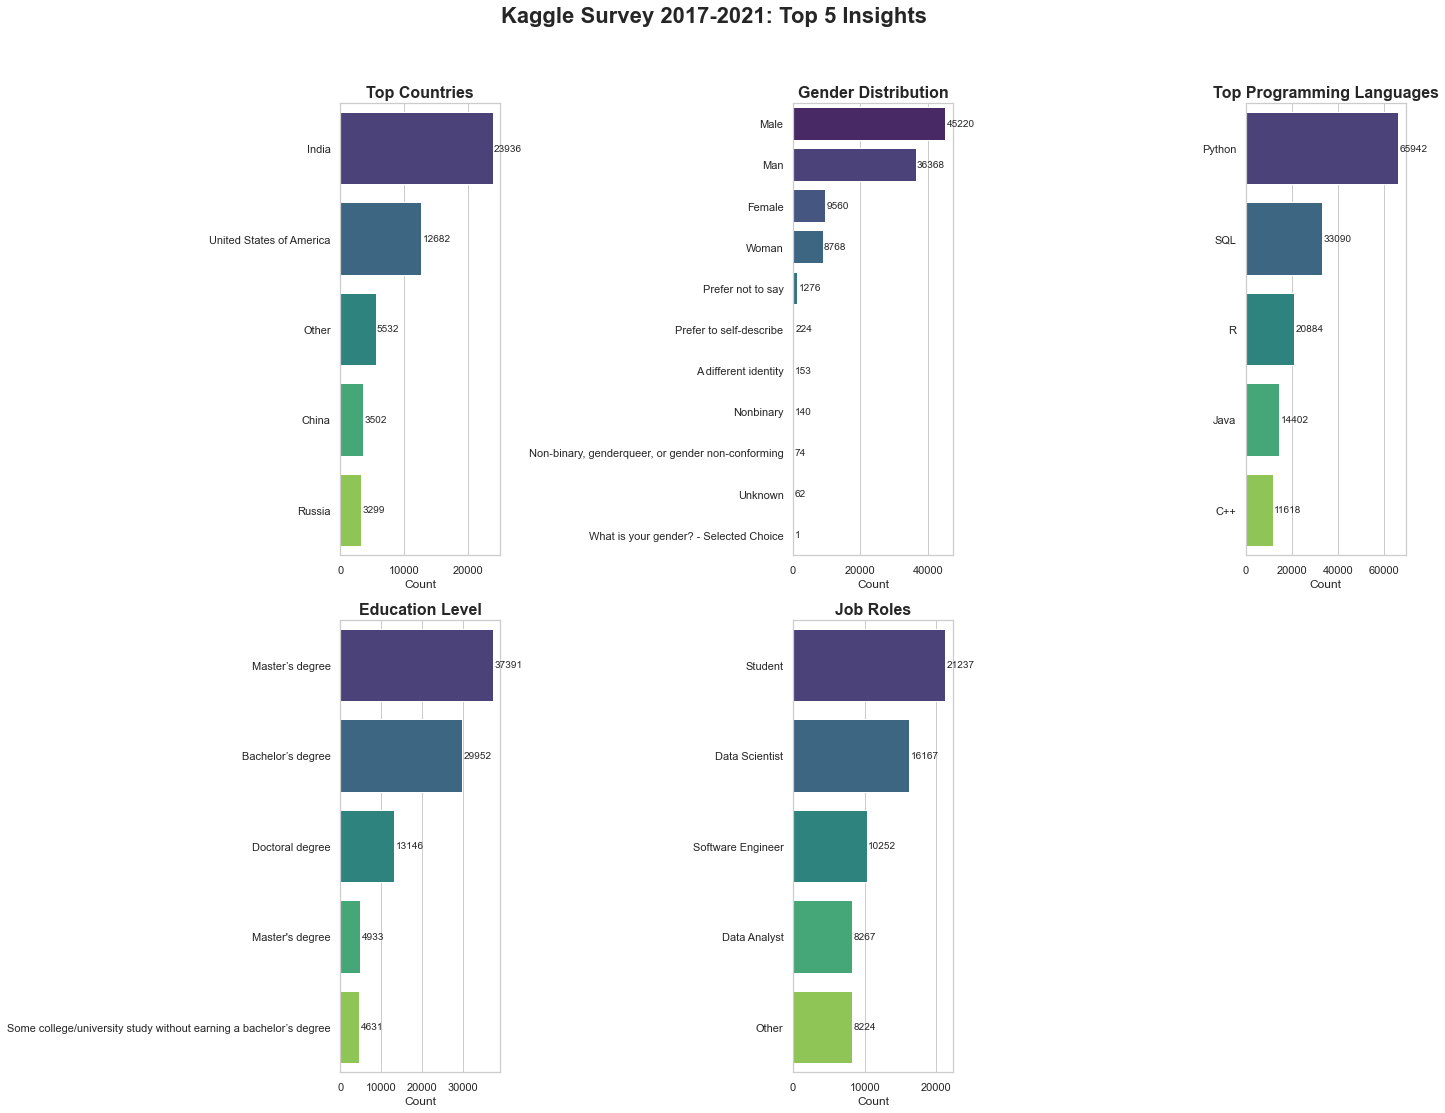

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,15))

for i, (title, data) in enumerate(insights.items(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=data.values, y=data.index, palette="viridis")
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("")
    
    # Add value labels
    for j, v in enumerate(data.values):
        plt.text(v + max(data.values)*0.01, j, str(int(v)), va='center', fontsize=10)

plt.suptitle("Kaggle Survey 2017-2021: Top 5 Insights", fontsize=22, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()